In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

from geopy.geocoders import Nominatim

In [2]:
#read the json as a dataframe obj
df = pd.read_json("schoolInfo.json")


In [3]:
pd.options.display.max_columns = None

In [4]:
#printing the size of the dataset
print(df.shape)
#first 5 rows present in the dataset
df.head()

(311, 39)


,rankingNoteText,nonResponderText,nonResponder,act-avg,primaryPhoto,primaryPhotoThumb,sat-avg,enrollment,city,sortName,zip,rankingNoteCharacter,acceptance-rate,rankingDisplayScore,percent-receiving-aid,cost-after-aid,state,rankingSortRank,hs-gpa-avg,urlName,rankingDisplayName,rankingDisplayRank,ranking,xwalkId,rankingIsTied,isPublic,businessRepScore,tuition,engineeringRepScore,displayName,schoolType,region,aliasNames,rankingType,overallRank,institutionalControl,rankingMaxPossibleScore,rankingRankStatus,primaryKey
0,NaN,None,False,32.0,https://www.usnews.com/img/college-photo_31291...,https://www.usnews.com/img/college-photo_31291...,1400.0,5400.0,Princeton,princetonuniversity,8544,NaN,7.0,100.0,60.0,16793.0,NJ,1,3.9,princeton-university,National Universities,#1,overall,186131,False,True,NaN,47140,4.1,Princeton University,national-universities,NaN,None,national-universities,1,private,NaN,ranked,2627
1,NaN,None,False,32.0,https://www.usnews.com/img/college-photo_8866.jpg,https://www.usnews.com/img/college-photo_8866_...,1430.0,6710.0,Cambridge,harvarduniversity,2138,NaN,5.0,98.0,55.0,16338.0,MA,2,4.0,harvard-university,National Universities,#2,overall,166027,False,True,NaN,48949,3.6,Harvard University,national-universities,NaN,None,national-universities,2,private,NaN,ranked,2155
2,NaN,None,False,32.0,https://www.usnews.com/dims4/USNEWS/5b128f0/17...,https://www.usnews.com/dims4/USNEWS/196469f/17...,1450.0,5941.0,Chicago,universityofchicago,60637,NaN,8.0,96.0,42.0,27767.0,IL,3,4.0,university-of-chicago,National Universities,#3,overall,144050,True,True,NaN,54825,NaN,University of Chicago,national-universities,NaN,UChicago,national-universities,3,private,NaN,ranked,1774
3,NaN,None,False,32.0,https://www.usnews.com/dims4/USNEWS/60348dd/17...,https://www.usnews.com/dims4/USNEWS/1ca230f/17...,1420.0,5472.0,New Haven,yaleuniversity,6520,NaN,6.0,96.0,50.0,18385.0,CT,3,NaN,yale-university,National Universities,#3,overall,130794,True,True,NaN,51400,3.4,Yale University,national-universities,NaN,None,national-universities,3,private,NaN,ranked,1426
4,NaN,None,False,32.0,https://www.usnews.com/img/college-photo_19002...,https://www.usnews.com/img/college-photo_19002...,1430.0,6113.0,New York,columbiauniversity,10027,NaN,6.0,95.0,48.0,21041.0,NY,5,NaN,columbia-university,National Universities,#5,overall,190150,True,True,NaN,57208,3.8,Columbia University,national-universities,NaN,None,national-universities,5,private,NaN,ranked,2707


In [5]:
#printing information about each feature present in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rankingNoteText          0 non-null      float64
 1   nonResponderText         11 non-null     object 
 2   nonResponder             311 non-null    bool   
 3   act-avg                  291 non-null    float64
 4   primaryPhoto             264 non-null    object 
 5   primaryPhotoThumb        264 non-null    object 
 6   sat-avg                  291 non-null    float64
 7   enrollment               300 non-null    float64
 8   city                     311 non-null    object 
 9   sortName                 311 non-null    object 
 10  zip                      311 non-null    int64  
 11  rankingNoteCharacter     0 non-null      float64
 12  acceptance-rate          302 non-null    float64
 13  rankingDisplayScore      230 non-null    float64
 14  percent-receiving-aid    1

In [6]:
# drop columns which have only NaN values
df.dropna(axis=1, thresh=1, inplace=True)

In [7]:
#printing the first 5 rows
df.head()

,nonResponderText,nonResponder,act-avg,primaryPhoto,primaryPhotoThumb,sat-avg,enrollment,city,sortName,zip,acceptance-rate,rankingDisplayScore,percent-receiving-aid,cost-after-aid,state,rankingSortRank,hs-gpa-avg,urlName,rankingDisplayName,rankingDisplayRank,ranking,xwalkId,rankingIsTied,isPublic,businessRepScore,tuition,engineeringRepScore,displayName,schoolType,aliasNames,rankingType,overallRank,institutionalControl,rankingRankStatus,primaryKey
0,None,False,32.0,https://www.usnews.com/img/college-photo_31291...,https://www.usnews.com/img/college-photo_31291...,1400.0,5400.0,Princeton,princetonuniversity,8544,7.0,100.0,60.0,16793.0,NJ,1,3.9,princeton-university,National Universities,#1,overall,186131,False,True,NaN,47140,4.1,Princeton University,national-universities,None,national-universities,1,private,ranked,2627
1,None,False,32.0,https://www.usnews.com/img/college-photo_8866.jpg,https://www.usnews.com/img/college-photo_8866_...,1430.0,6710.0,Cambridge,harvarduniversity,2138,5.0,98.0,55.0,16338.0,MA,2,4.0,harvard-university,National Universities,#2,overall,166027,False,True,NaN,48949,3.6,Harvard University,national-universities,None,national-universities,2,private,ranked,2155
2,None,False,32.0,https://www.usnews.com/dims4/USNEWS/5b128f0/17...,https://www.usnews.com/dims4/USNEWS/196469f/17...,1450.0,5941.0,Chicago,universityofchicago,60637,8.0,96.0,42.0,27767.0,IL,3,4.0,university-of-chicago,National Universities,#3,overall,144050,True,True,NaN,54825,NaN,University of Chicago,national-universities,UChicago,national-universities,3,private,ranked,1774
3,None,False,32.0,https://www.usnews.com/dims4/USNEWS/60348dd/17...,https://www.usnews.com/dims4/USNEWS/1ca230f/17...,1420.0,5472.0,New Haven,yaleuniversity,6520,6.0,96.0,50.0,18385.0,CT,3,NaN,yale-university,National Universities,#3,overall,130794,True,True,NaN,51400,3.4,Yale University,national-universities,None,national-universities,3,private,ranked,1426
4,None,False,32.0,https://www.usnews.com/img/college-photo_19002...,https://www.usnews.com/img/college-photo_19002...,1430.0,6113.0,New York,columbiauniversity,10027,6.0,95.0,48.0,21041.0,NY,5,NaN,columbia-university,National Universities,#5,overall,190150,True,True,NaN,57208,3.8,Columbia University,national-universities,None,national-universities,5,private,ranked,2707


In [8]:
df = df.drop(df.columns[[0,1,3,4,16,18,20,21,24,28,30]], axis=1)

print(df.shape)
#printing the first 5 rows
df.head()

(311, 24)


,act-avg,sat-avg,enrollment,city,sortName,zip,acceptance-rate,rankingDisplayScore,percent-receiving-aid,cost-after-aid,state,rankingSortRank,urlName,rankingDisplayRank,rankingIsTied,isPublic,tuition,engineeringRepScore,displayName,aliasNames,overallRank,institutionalControl,rankingRankStatus,primaryKey
0,32.0,1400.0,5400.0,Princeton,princetonuniversity,8544,7.0,100.0,60.0,16793.0,NJ,1,princeton-university,#1,False,True,47140,4.1,Princeton University,None,1,private,ranked,2627
1,32.0,1430.0,6710.0,Cambridge,harvarduniversity,2138,5.0,98.0,55.0,16338.0,MA,2,harvard-university,#2,False,True,48949,3.6,Harvard University,None,2,private,ranked,2155
2,32.0,1450.0,5941.0,Chicago,universityofchicago,60637,8.0,96.0,42.0,27767.0,IL,3,university-of-chicago,#3,True,True,54825,NaN,University of Chicago,UChicago,3,private,ranked,1774
3,32.0,1420.0,5472.0,New Haven,yaleuniversity,6520,6.0,96.0,50.0,18385.0,CT,3,yale-university,#3,True,True,51400,3.4,Yale University,None,3,private,ranked,1426
4,32.0,1430.0,6113.0,New York,columbiauniversity,10027,6.0,95.0,48.0,21041.0,NY,5,columbia-university,#5,True,True,57208,3.8,Columbia University,None,5,private,ranked,2707


In [9]:
#data types of the features present
df.dtypes

act-avg                  float64
sat-avg                  float64
enrollment               float64
city                      object
sortName                  object
zip                        int64
acceptance-rate          float64
rankingDisplayScore      float64
percent-receiving-aid    float64
cost-after-aid           float64
state                     object
rankingSortRank            int64
urlName                   object
rankingDisplayRank        object
rankingIsTied               bool
isPublic                    bool
tuition                    int64
engineeringRepScore      float64
displayName               object
aliasNames                object
overallRank                int64
institutionalControl      object
rankingRankStatus         object
primaryKey                 int64
dtype: object

In [10]:
#appending the city and state to get a location tag
place = df['city'][0:300] +[','] + df['state'][0:300]

In [11]:
place

0       Princeton,NJ
1       Cambridge,MA
2         Chicago,IL
3       New Haven,CT
4        New York,NY
           ...      
295    Carrollton,GA
296     Milwaukee,WI
297      Valdosta,GA
298       Wichita,KS
299        Dayton,OH
Length: 300, dtype: object

In [12]:
place[1]

'Cambridge,MA'

In [13]:
#getting the latitude and longitude of the location (city+state)
data = {'Longitude':[], 'Latitude':[], 'Location':[]}
geolocator = Nominatim(user_agent = "my_app")
for loc in range(300):
    location = geolocator.geocode(place[loc])
    #print(location.address)
    #print(location.latitude, location.longitude)
    data['Longitude'].append(location.longitude)
    data['Latitude'].append(location.latitude)
    data['Location'].append(location.address)

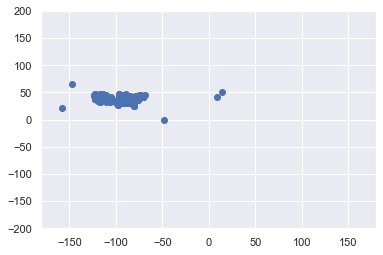

In [14]:
#plotting the longitude and latitude lists
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-200,200)
plt.show()

In [15]:
coo = pd.DataFrame.from_dict(data,orient='index').transpose()
coo

,Longitude,Latitude,Location
0,-74.668423,40.348336,"Princeton, Mercer County, New Jersey, United S..."
1,-71.105616,42.3751,"Cambridge, Middlesex County, Massachusetts, Un..."
2,-87.624421,41.875562,"Chicago, Cook County, Illinois, United States"
3,-72.925052,41.308214,"New Haven, New Haven County, Connecticut, Unit..."
4,-74.006015,40.712728,"New York, United States"
...,...,...,...
295,-85.076611,33.58011,"Carrollton, Carroll County, Georgia, United St..."
296,-87.922497,43.034993,"Milwaukee, Milwaukee County, Wisconsin, United..."
297,-83.278485,30.832702,"Valdosta, Lowndes County, Georgia, 31604, Unit..."
298,-97.337545,37.692236,"Wichita, Sedgwick County, Kansas, 67202, Unite..."


In [16]:
#k-means model with 5 clusters
x = coo.iloc[0:300,0:2]
kmeans = KMeans(5)
kmeans.fit(x)

KMeans(n_clusters=5)

In [17]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 3, 1, 1, 1, 2, 1, 1, 2, 1, 1, 3, 1, 1, 0, 3, 3, 3, 1, 3, 2,
       2, 2, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 2, 1, 3, 1, 2, 2,
       3, 1, 2, 2, 3, 3, 4, 1, 3, 3, 3, 1, 3, 1, 0, 2, 2, 1, 0, 1, 1, 1,
       3, 1, 1, 1, 1, 0, 0, 3, 0, 0, 1, 3, 0, 3, 1, 3, 3, 1, 2, 1, 1, 0,
       0, 3, 3, 0, 2, 1, 3, 1, 1, 1, 1, 1, 0, 1, 3, 3, 3, 1, 2, 3, 3, 1,
       3, 2, 2, 2, 2, 0, 1, 0, 0, 1, 3, 1, 0, 1, 0, 3, 1, 2, 2, 3, 0, 1,
       0, 3, 1, 1, 0, 3, 3, 1, 1, 2, 3, 2, 0, 2, 1, 3, 3, 0, 1, 3, 3, 2,
       1, 0, 1, 1, 2, 3, 3, 2, 2, 1, 4, 3, 0, 1, 2, 3, 3, 1, 3, 2, 1, 3,
       1, 0, 3, 1, 3, 1, 3, 1, 1, 0, 2, 3, 1, 1, 1, 3, 3, 0, 0, 0, 1, 0,
       0, 3, 3, 3, 2, 0, 1, 2, 3, 1, 3, 2, 2, 0, 1, 2, 3, 3, 0, 0, 3, 3,
       0, 2, 3, 3, 2, 3, 3, 1, 0, 3, 1, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2,
       3, 1, 3, 3, 0, 1, 3, 3, 1, 3, 3, 2, 3, 0, 1, 2, 0, 1, 0, 2, 3, 3,
       3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 3, 1, 3, 3, 0, 2, 3, 3, 0, 0,
       3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 3])

In [18]:
data_with_clusters = coo.copy()
data_with_clusters['Clusters'] = identified_clusters 


In [19]:
#top 50 rows with the lon, lat and location and the cluster they were assigned to
data_with_clusters[1:50]

,Longitude,Latitude,Location,Clusters
1,-71.105616,42.3751,"Cambridge, Middlesex County, Massachusetts, Un...",1
2,-87.624421,41.875562,"Chicago, Cook County, Illinois, United States",3
3,-72.925052,41.308214,"New Haven, New Haven County, Connecticut, Unit...",1
4,-74.006015,40.712728,"New York, United States",1
5,-71.105616,42.3751,"Cambridge, Middlesex County, Massachusetts, Un...",1
6,-122.170293,37.426541,"Stanford, Palo Alto, Santa Clara County, Calif...",2
7,-75.163526,39.952724,"Philadelphia, Philadelphia County, Pennsylvani...",1
8,-78.901805,35.996653,"Durham, Durham County, North Carolina, 27701, ...",1
9,-118.144478,34.147645,"Pasadena, Los Angeles County, California, Unit...",2
10,-72.288666,43.703622,"Hanover, Grafton County, New Hampshire, United...",1


In [20]:
#centroids of the 5 clusters
centroids = kmeans.cluster_centers_
centroids

array([[ -97.51853445,   35.69494226],
       [ -74.64629451,   40.24412   ],
       [-119.49786101,   38.38096619],
       [ -85.40041123,   36.89102678],
       [  11.53154919,   46.02651225]])

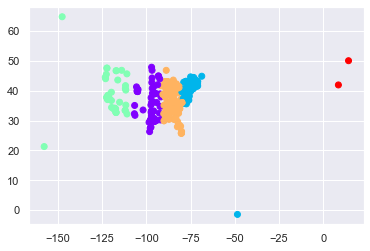

In [21]:
#plot of the clusters
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Clusters'],cmap='rainbow')

In [22]:
#list of states
s = []
for i in df['state']:
    if i not in s:
        s.append(i)

In [23]:
#list of cities
c = []
for i in df['city']:
    if i not in c:
        c.append(i)

In [24]:
#a dictionary which stores the states and respective cities
state_city = {}
for i in range(0,300):
    temp = df['state'].values[i]
    if temp not in state_city.keys():        
        state_city[temp] = []
        state_city[temp] .append(df['city'].values[i])
    else:
        city_temp = df['city'].values[i]
        if city_temp not in state_city[temp]:
            state_city[temp].append(city_temp)
print(state_city)
    

{'NJ': ['Princeton', 'Piscataway', 'Hoboken', 'South Orange', 'Newark', 'Glassboro', 'Montclair'], 'MA': ['Cambridge', 'Medford', 'Chestnut Hill', 'Waltham', 'Boston', 'Worcester', 'Amherst', 'Lowell', 'North Dartmouth', 'Springfield'], 'IL': ['Chicago', 'Evanston', 'Champaign', 'Normal', 'Carbondale', 'Lisle', 'DeKalb', 'Deerfield'], 'CT': ['New Haven', 'Storrs', 'West Hartford'], 'NY': ['New York', 'Ithaca', 'Rochester', 'Troy', 'Syracuse', 'Binghamton', 'Stony Brook', 'Buffalo', 'Potsdam', 'Hempstead', 'Garden City', 'Albany', 'Queens'], 'CA': ['Stanford', 'Pasadena', 'Berkeley', 'Los Angeles', 'Santa Barbara', 'Irvine', 'La Jolla', 'Malibu', 'Davis', 'Santa Cruz', 'San Diego', 'San Francisco', 'Stockton', 'Riverside', 'La Mirada', 'La Verne', 'Merced', 'Azusa', 'Fullerton', 'Fresno'], 'PA': ['Philadelphia', 'Pittsburgh', 'Bethlehem', 'Villanova', 'University Park', 'Immaculata', 'Moon Township', 'Chester', 'Indiana'], 'NC': ['Durham', 'Winston-Salem', 'Chapel Hill', 'Raleigh', 'Cha

In [25]:
state_city['NJ']

['Princeton',
 'Piscataway',
 'Hoboken',
 'South Orange',
 'Newark',
 'Glassboro',
 'Montclair']

In [26]:
import tkinter as tk
import tkinter.ttk as ttk
from tkinter import messagebox

def submit():
    price_input = float(price_tb.get("1.0", "end-1c"))
    state  = statelocation_menu.get()
    city = citylocation_menu.get()
    if(getthenearestcluster(price_input,state,city)):
        root.destroy()
    else:
        #a info box will be displayed as we have no collges to display
        tk.messagebox.showinfo("Modify", "Looks like we dont have any colleges for your ask, please try modifying it")

In [27]:
#for the user's input get the nearest cluster based on the location
def getthenearestcluster(price, state, city):
    place = state +','+city
    geolocator = Nominatim(user_agent = "my_app")
    location = geolocator.geocode(place)
    users_longitude = location.longitude
    users_latitude = location.latitude
    users_address = location.address
    print("Users location data",users_longitude,users_latitude,users_address)
    users = [users_longitude,users_latitude]
    difference =[abs(users[0] - centroids[0][0]),abs(users[1] - centroids[0][1])]
    
    print(users-centroids)
    users = users - centroids
    sum = abs(users[0][1]) + abs(users[0][1])
    index = 0  
    for i in range(1,len(centroids)):
        temp = abs(users[i][0]) + abs(users[i][1])
        if(sum > temp):
            sum = temp
            index = i
    print("Nearest cluster",index)
    return getunivsinthatcluster(index,price)
            
    
        

In [28]:
#appends the university names and the location  present in the cluster to respective list
def getunivsinthatcluster(index,price):
    univnames = []
    plot_data_long = []
    plot_data_lat = []
    for i in range(0,300):
        if data_with_clusters['Clusters'].values[i] == index:
            if abs(df['tuition'].values[i] - price) <= 5000:
                univnames.append(df['displayName'].values[i])
                plot_data_long.append(data_with_clusters['Longitude'].values[i])
                plot_data_lat.append(data_with_clusters['Latitude'].values[i])
                
    #if you do not have any colleges in the list then ask the user to modify the ask
    if len(univnames) == 0:
        #print("Looks like we dont have any colleges for your ask, please try modifying it")
        return False
    else:
        display_map(plot_data_long,plot_data_lat,univnames)        
        print(univnames)
        return True

In [29]:
data_with_clusters['Longitude'].values[0]

-74.6684230570877

In [30]:
#required libraries for the map part
import math
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster


In [31]:
# a function which plots the locations on the map
def display_map(plot_data_long,plot_data_lat,univnames):
    print(plot_data_long)
    print(plot_data_lat)
    temp = ''
    

    # Add points to the map
    for i in range (0,len(plot_data_lat)):
        temp = ''
        temp = 'Name -' + univnames[i]+' Overall Rank-: ' + df['overallRank'][i].astype(str)
        Marker(location = [plot_data_lat[i],plot_data_long[i]],
               popup=temp).add_to(m_1)

    m_1

In [32]:
#GUI Part
root = tk.Tk()
root.geometry("500x520")
m_1 = folium.Map(location=[42.32,-81.0589], tiles='openstreetmap', zoom_start=3)



# creating a dropdown list
# datatype of menu text
state_clicked = tk.StringVar()
state_options = s



city_clicked = tk.StringVar()
city_options = c

#dropdown menu for the state selection
statelocation_menu = ttk.Combobox(root , textvariable = state_clicked )
statelocation_menu['values'] = state_options
statelocation_menu['state'] = 'readonly'
statelocation_label = tk.Label( root , text = "Please select your State" )

#a click event that gets triggered when a state is selected
def state_selected(event):
    """ handle the month changed event """
    citylocation_menu['values'] = state_city[statelocation_menu.get()]

statelocation_menu.bind('<<ComboboxSelected>>', state_selected)

#dropdown menu for the city selection
citylocation_menu = ttk.Combobox(root , textvariable = city_clicked )
citylocation_menu['values'] = city_options
citylocation_menu['state'] = 'readonly'
citylocation_label = tk.Label( root , text = "Please select your City" )

#positioning the state and city boxes and labels on the window
statelocation_label.grid(row = 0, column = 0)
statelocation_menu.grid(row = 0, column = 1)

citylocation_label.grid(row = 3, column = 0)
citylocation_menu.grid(row = 3, column = 1)

price_tb = tk.Text(root,height = 1, width = 10)
price_tb.grid(row = 5, column =1)

#text box to take amount from the user
price_label = tk.Label(root,text = "Estimated fee amount").grid(row = 5 , column = 0)


#submit button    
submit_button = tk.Button( root , text = "Submit" , command = lambda:submit() )
submit_button.grid(row = 8)


root.mainloop()

Users location data -77.8585662 40.8087493 University Park, College Township, Centre County, Pennsylvania, 16802-2604, United States
[[ 19.65996825   5.11380704]
 [ -3.21227169   0.5646293 ]
 [ 41.63929481   2.42778311]
 [  7.54184503   3.91772252]
 [-89.39011539  -5.21776295]]
Nearest cluster 1
[-78.4766781, -76.7074042, -76.1474244, -77.0365427, -71.8018877, -74.0060152, -77.615214, -73.212906, -77.0365427, -74.2635376, -73.61385560142261, -73.6343052, -73.8283132, -72.7420399, -71.0582912, -74.0060152, -75.3557458]
[38.029306, 37.2708788, 43.0481221, 38.8950368, 42.2625621, 40.7127281, 43.157285, 44.4761601, 38.8950368, 40.7474966, 40.6399646, 40.7266477, 40.7135078, 41.7620447, 42.3602534, 40.7127281, 39.849557]
['University of Virginia', 'College of William and Mary', 'Syracuse University', 'American University', 'Clark University', 'Yeshiva University', 'Rochester Institute of Technology', 'University of Vermont', 'The Catholic University of America', 'Seton Hall University', 'Ho

In [33]:
#run this cell to get the univ locations on the map
m_1